<a href="https://colab.research.google.com/github/EnzoMoraes-full/Beginner-Python-Challengess/blob/main/Trabalho_rp_rl_rn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes**

***Enzo, RA -> 	0051352321045 (045)***

***Dayse, RA -> 	0051352321037 (037)***

# ***Exercicio 1: Regressao Polinomial***

In [ ]:
import matplotlib.pyplot as plt
import math
import random

In [ ]:
def gera_y(x):
    y = 0
    for i in range(37 + 1):
        y += random.gauss(0, 1) * (x ** i)
    return y

X = [i / 100 for i in range(-100, 101)]
Y = [gera_y(x) + random.gauss(0, 0.1) for x in X]

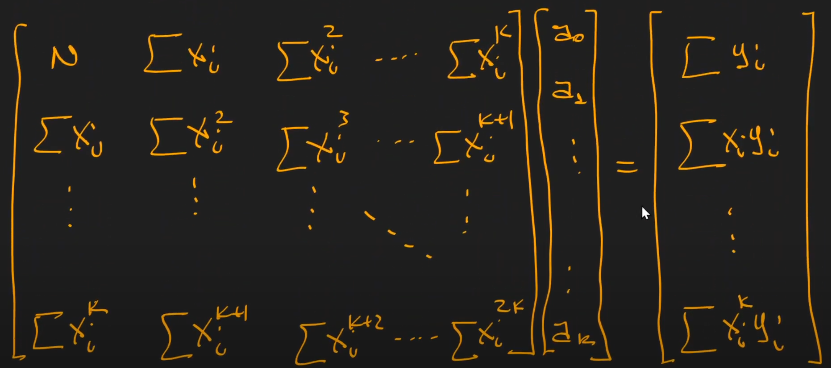

In [ ]:
def melhor_polinomio(X, Y, k):
  n = len(X)
  if n <= k:
   return "O numero de pontos deve ser maior que o grau (k) do polinomio!"

  somas = {}
  somas[0] = n
  for n in range(1, 2 * k + 1):
    somas[n] = sum(xi ** n for xi in X)

  A = []
  B = []
  for i in range(k + 1):
    linha = []
    for j in range(k + 1):
      linha.append(somas[i + j])
    A.append(linha)
    if i == 0:
      B.append(sum(Y))
    else:
      B.append(sum(yi * xi ** i for xi, yi in zip(X, Y)))

  return gauss(A, B)

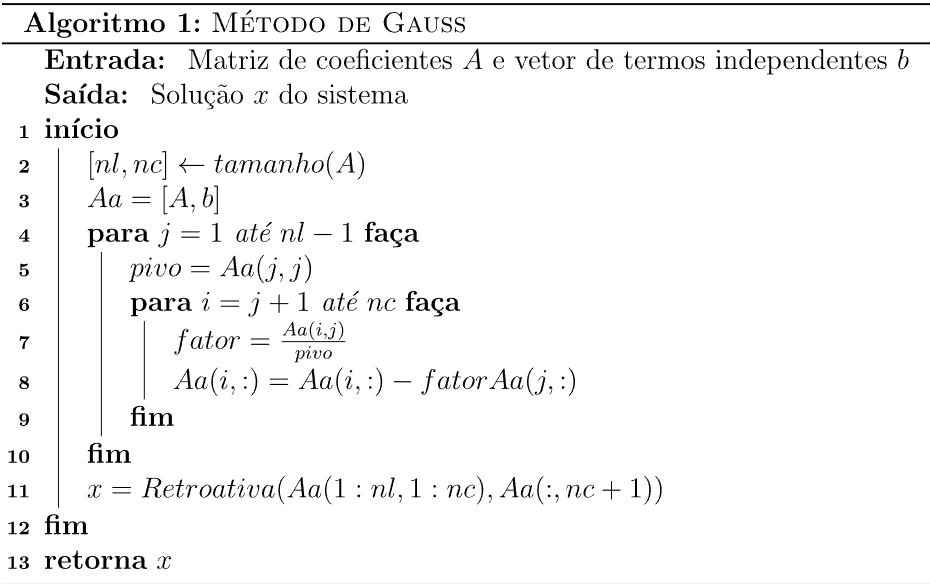

In [ ]:
def gauss(A, B):
  n = len(A)

  for i in range(n):
    A[i].append(B[i])

  for j in range(n):
    pivo = A[j][j]
    for i in range(j + 1, n):
      fator = A[i][j] / pivo
      for k in range(len(A[j])):
        A[i][k] -= fator * A[j][k]

    x = [0] * n
    for i in range(n - 1, -1, -1):
        soma = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x[i] = (A[i][n] - soma) / A[i][i]

  return x

In [ ]:
grau = 37
coeficientes = melhor_polinomio(X, Y, grau)

***f(x) = ∑(i = 0, k) ai * x ** i***

In [ ]:
def polinomio(x, coeficientes):
    return sum(coeficientes[i] * (x ** i) for i in range(len(coeficientes)))

***f(xi) = ∑(j = 0, k) * aj * xi ** k***

In [ ]:
Y_ajustado = [polinomio(x, coeficientes) for x in X]

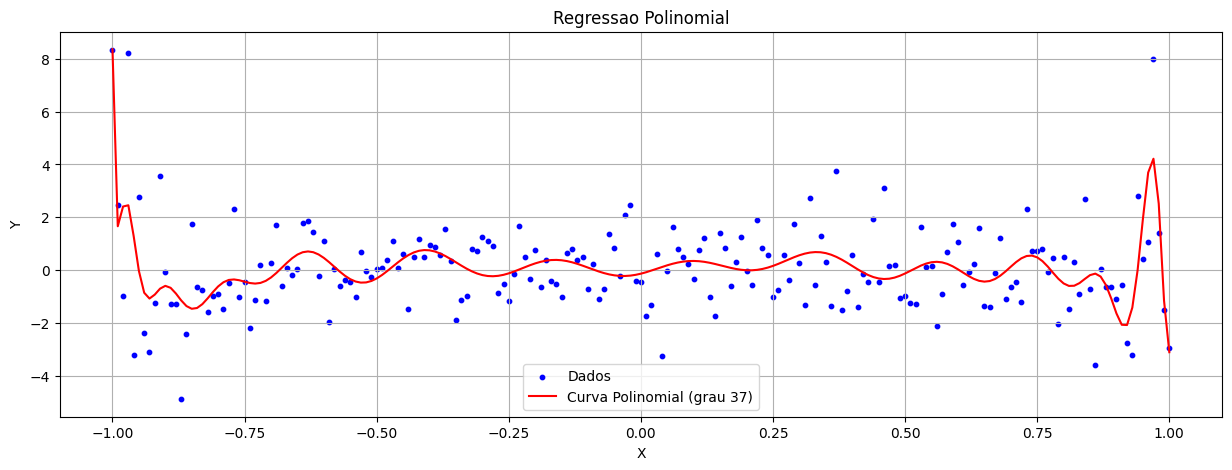

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(X, Y, color='blue', label='Dados', s=10)
plt.plot(X, Y_ajustado, color='red', label=f'Curva Polinomial (grau {grau})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressao Polinomial')
plt.legend()
plt.grid(True)
plt.show()

# ***Exercicio 2: Regressao Logistica***

In [25]:
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
from google.colab import drive

In [26]:
#https://www.kaggle.com/datasets/erdemtaha/cancer-data/data?select=Cancer_Data.csv

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/datasets/Cancer_Data_formated.csv")
X = data['concave points_worst'].values
Y = data['diagnosis'].values

X = (X - min(X)) / (max(X) - min(X))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


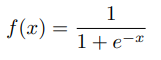

In [27]:
def sigmoid(x):
  return 1 / (1  + math.exp(-x))

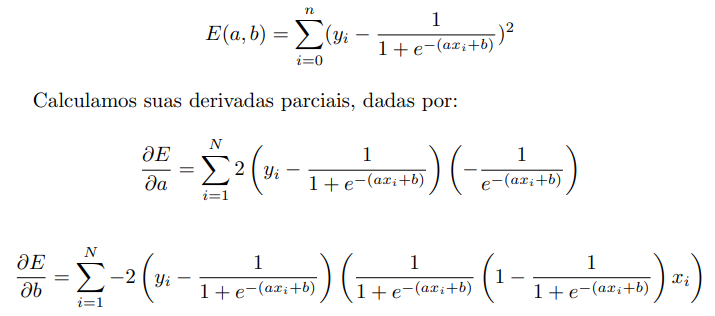

In [28]:
def EQM(X, Y, a, b): #erro quadratico medio
  grad_a = 0
  grad_b = 0
  for i in range(len(X)):
    ex_sigmoid = sigmoid(a * X[i] + b)
    #grad_a += 2 * (Y[i] - ex_sigmoid) * (-ex_sigmoid)
    #grad_b += -2 * (Y[i] - ex_sigmoid) * (ex_sigmoid * ( 1 - ex_sigmoid) * X[i])
    grad_a += -2 * (Y[i] - ex_sigmoid) * (ex_sigmoid * (1 - ex_sigmoid) * X[i])
    grad_b += -2 * (Y[i] - ex_sigmoid) * (ex_sigmoid * ( 1 - ex_sigmoid))

  return grad_a, grad_b

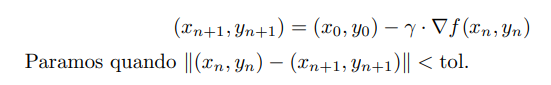

In [29]:
def condicao_parada(x_n, x_0, y_n, y_0):
  return math.sqrt((x_n - x_0)**2 + (y_n - y_0)**2)

In [30]:
def GD(x_0, y_0, tol, lr):
  x_n = x_0
  y_n = y_0
  i = 0
  while True:
      grad_a, grad_b = EQM(X, Y, x_n, y_n)
      x_n1 = x_n - lr * grad_a
      y_n1 = y_n - lr * grad_b
      if condicao_parada(x_n1, x_n, y_n1, y_n) <= tol:
          break
      x_n = x_n1
      y_n = y_n1
      i += 1
  return i, x_n, y_n

In [31]:
n_interacoes, a_final, b_final = GD(0, 0, 0.0001, 0.01)

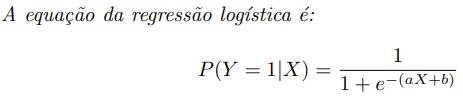

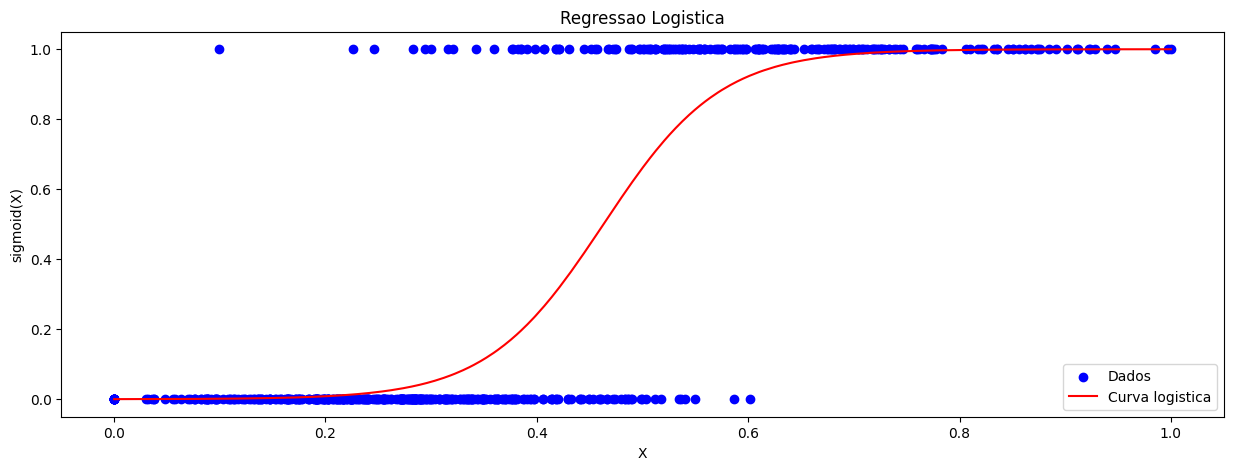

In [32]:
plt.close('all')
plt.figure(figsize=(15, 5))
plt.scatter(X, Y, color='blue', label='Dados')
plt.plot(X, [sigmoid(a_final * x + b_final) for x in X], color='red', label='Curva logistica')
plt.xlabel('X')
plt.ylabel('sigmoid(X)')
plt.title('Regressao Logistica')
plt.legend()
plt.show()

In [33]:
Y_previsto = [random.choice([0, 1]) for x in range(len(Y))]

VP = sum(1 for y, y_pred in zip(Y, Y_previsto) if y == 1 and y_pred == 1)
VN = sum(1 for y, y_pred in zip(Y, Y_previsto) if y == 0 and y_pred == 0)
FP = sum(1 for y, y_pred in zip(Y, Y_previsto) if y == 0 and y_pred == 1)
FN = sum(1 for y, y_pred in zip(Y, Y_previsto) if y == 1 and y_pred == 0)

acuracia_rl = (VP + VN) / (VP + VN + FP + FN)
precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
revocacao = VP / (VP + FN) if (VP + FN) > 0 else 0
f1_score_rl = 2 * (precisao * revocacao) / (precisao + revocacao) if (precisao + revocacao) > 0 else 0

In [34]:
print("Interacoes: ", n_interacoes)
print("Coeficiente (a)", a_final)
print("Intercepto (b)", b_final)
print("Acuracia:", acuracia_rl)
print("F1-Score:", f1_score_rl)

Interacoes:  6720
Coeficiente (a) 18.085287420339846
Intercepto (b) -8.374738236879653
Acuracia: 0.5061511423550088
F1-Score: 0.43232323232323233


#***Exercicio 3: Rede Neural***







In [35]:
import tensorflow as tf

In [36]:
X_train = X.reshape(-1, 1)
Y_train = Y.reshape(-1, 1)

In [37]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(1,)),
tf.keras.layers.Dense(3, activation='sigmoid'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
historico_treinamento = model.fit(X_train, Y_train, epochs=700, verbose=0)

In [40]:
loss, acuracia_rn = model.evaluate(X_train, Y_train, verbose=0)

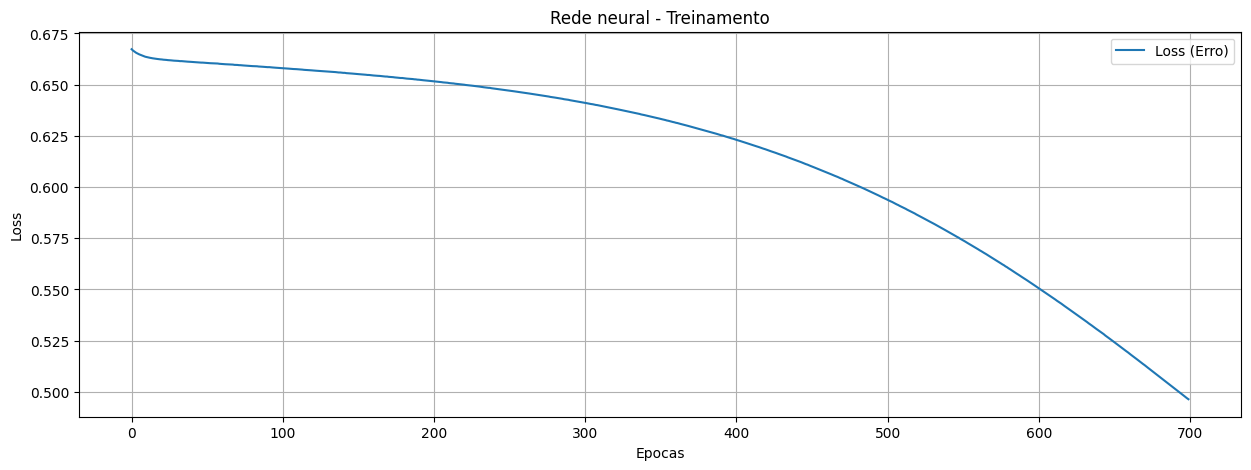

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(historico_treinamento.history['loss'], label='Loss (Erro)')
plt.title('Rede neural - Treinamento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


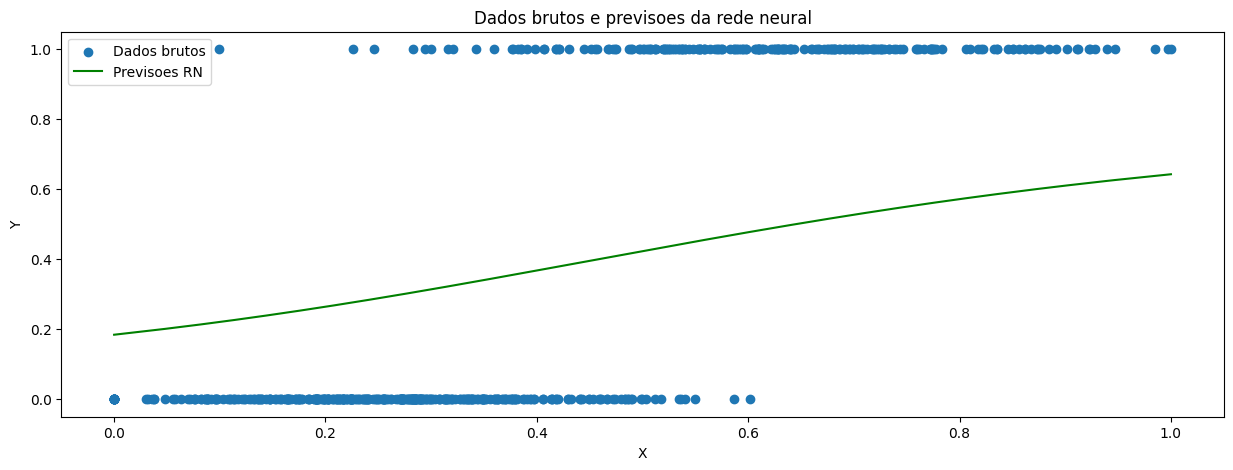

In [42]:
Y_previsto_rn = model.predict(X_train)
plt.figure(figsize=(15, 5))
plt.scatter(X, Y, label='Dados brutos')
plt.plot(X, Y_previsto_rn, color='green', label='Previsoes RN')
plt.title('Dados brutos e previsoes da rede neural')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [43]:
print("Acuracia:", acuracia_rn)

Acuracia: 0.7855887413024902


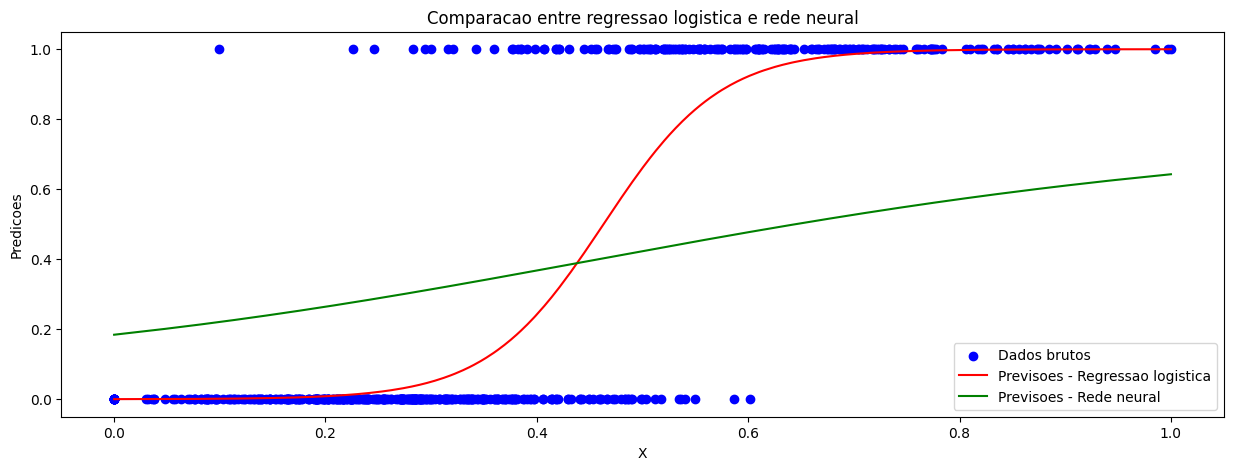

In [44]:
# Comparacao: rede neural e regressao logistica

plt.figure(figsize=(15, 5))
plt.scatter(X, Y, color='blue', label='Dados brutos')
plt.plot(X, [sigmoid(a_final * x + b_final) for x in X], color='red', label='Previsoes - Regressao logistica')
plt.plot(X, Y_previsto_rn, color='green', label='Previsoes - Rede neural')
plt.xlabel('X')
plt.ylabel('Predicoes')
plt.title('Comparacao entre regressao logistica e rede neural')
plt.legend()
plt.show()

In [45]:
print("Acuracia da rede neural:", acuracia_rn)
print("Acuracia da regressao logistica:", acuracia_rl)

Acuracia da rede neural: 0.7855887413024902
Acuracia da regressao logistica: 0.5061511423550088
